# \<Title\>

Imports

In [1]:
import os
import sys
import datetime
import dill as pickle
import matplotlib.pyplot as plt

Import custom libraries

In [2]:
# original py files
sys.path.insert(1, r'W:\OneDrive - TU Eindhoven\DS&AI\2024-2025\2024-2025 q1\2AMM20 - Research Topics in Data Mining\Research Project Phase\new_code\methods')

from data_methods import getData, standardize
from dimensionality_reduction import reduce_dimensionality,reduce_with
from beamSearch import EMM, as_string
from adjPysubgroup import adjustedBestFirstSearch, adjustedDFS, adjustedApriori
from qualityMeasures import calc_result_bs, calc_result_ps

set variables

In [3]:
dataset_name = 'Soybean'
reduction_method = 'PCA' # choose from 'PCA' or 'auto_encoder' (others were not implemented yet)
sd_results_path = r'sd_results'

## 1. Data

Open the dataset with name ```dataset_name```.

In [4]:
df, cat, num, features = getData(dataset_name)
df_original = df.copy()

Standardize the DataFrame <font color='red'>move to reduce_dimensionality method??</font>

In [5]:
# standardize
# df_std = standardize(df,num) # ? MOVE TO reduce_dimensionality FUNCTION??

## 2. Reduce Dimensionality

### 2.1 Find Optimal Number of Reduced Features

Set lower and upper bound estimates for the number of features 

In [6]:
l_est, r_est = 2, 12

Compare the <font color='red'>MSE</font> of performing dimensionality reduction to different numbers of features.

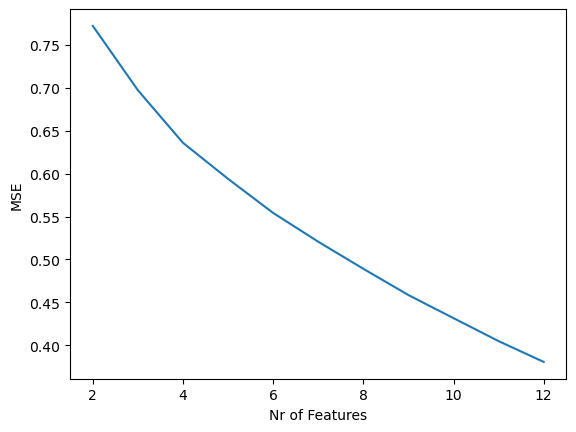

1.083409

In [7]:
t1 = datetime.datetime.now()
mseList = []

for i in range(l_est, r_est+1):

    df_en,mse = reduce_dimensionality(
                    data=df,
                    reduction_method=reduction_method,
                    catColumns=cat,
                    numColumns=num, 
                    nFeatures=i,
                    nEpochs=100
                )

    mseList.append(mse)
t2 = datetime.datetime.now()

plt.plot([i for i in range(l_est, r_est+1)], mseList)
plt.xlabel("Nr of Features") # ! new
plt.ylabel("MSE") # ! new
plt.show()

running_time = t2-t1
running_time.total_seconds()

From the results we can conclude that the optimal number of reduced features is ... 

In [8]:
optimal_nr_features = 6

### 2.2 reduce

In [9]:
df_en,_ = reduce_dimensionality(
            data=df,
            reduction_method=reduction_method,
            catColumns=cat,
            numColumns=num, 
            nFeatures=optimal_nr_features,
            nEpochs=100
        )

df_en.sample(5)

,target,PC1,PC2,PC3,PC4,PC5,PC6
154,0,0.051935,3.174248,0.469897,-1.655552,4.533277,-1.673531
192,1,-3.605897,-0.279056,-0.511507,-0.818084,0.229346,-0.973856
183,1,-3.964346,-0.461368,0.394628,1.153412,-1.226723,-1.227993
128,0,-3.563044,-0.486297,1.320642,1.383487,2.262401,1.602725
219,1,-3.992446,-0.081877,-1.414476,0.575523,-0.740429,0.434276


## 3. Subgroup Discovery
Run the subgroup discovery algorithms on the dataset.

### 3.1 Best First Search

In [10]:
bfs_results = {}

Find Subgroups

In [11]:
t1 = datetime.datetime.now()
results_df_n = adjustedBestFirstSearch(df)
results_df_n['subgroup'] = results_df_n['subgroup'].apply(lambda x: str(x))[0]
t2 = datetime.datetime.now()
running_time = t2-t1

bfs_results['df']=df
bfs_results['df_results']=results_df_n
bfs_results['df_running_time']=running_time

In [12]:
t1 = datetime.datetime.now()
results_df_en = adjustedBestFirstSearch(df_en)
results_df_en['subgroup'] = results_df_en['subgroup'].apply(lambda x: str(x))[0]
t2 = datetime.datetime.now()
running_time = t2-t1

bfs_results['df_en']=df_en
bfs_results['df_en_results']=results_df_en
bfs_results['df_en_running_time']=running_time

Save subgroups

In [13]:
now = datetime.datetime.now().strftime("%d-%m-%Y-%H-%M")
bfs_file_name = f'bfs-results-{now}.pkl'
with open(os.path.join(sd_results_path,bfs_file_name),'wb') as f:
    pickle.dump(bfs_results,f)

Analyze found subgroups

coverage auto-encoding: 52, (0.19548872180451127)
coverage no auto-encoding: 135, (0.5075187969924813)
# rows added in subgroups: 8 (0.03007518796992481)
# rows no longer in subgroups: 91, (0.34210526315789475)
average subgroup size auto encoded: 52.0
average subgroup size no auto encoding: 135.0
WRACC auto-encoding: Max: 0.07179603143196338, Mean: 0.022610944654870263
WRACC no auto-encoding: Max: 0.24068630222171972, Mean: 0.16175730680083666


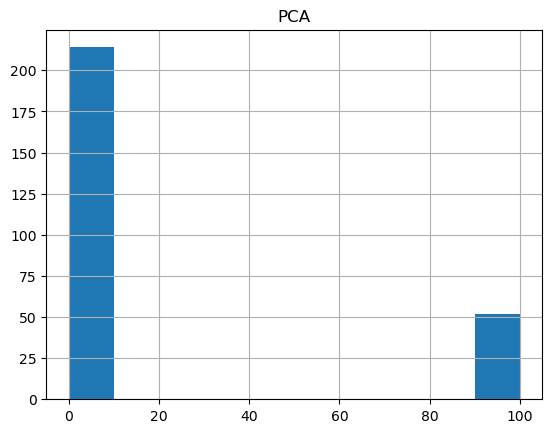

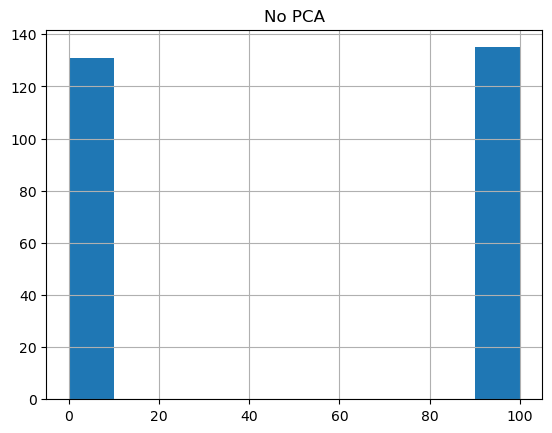

In [14]:
# Loading the object using dill
# with open(os.path.join(sd_results_path,bfs_file_name), 'rb') as f:
#     loaded_dict = pickle.load(f)

calc_result_ps(df_en, df, results_df_en, results_df_n,reduction_method)

### 3.2 Beam Search

In [15]:
# bs_results = {}

Find subgroups

In [16]:
# t1 = datetime.datetime.now()
# results_df_bs = EMM(100, 3, 100, [], df_original, features, 'target', ensure_diversity=True)
# t2 = datetime.datetime.now()
# bs_running_time = t2-t1
# bs_running_time

# bs_results['df']=df
# bs_results['df_results']=results_df_bs
# bs_results['df_running_time']=bs_running_time

In [17]:
# t1 = datetime.datetime.now()
# features_en = [col for col in df_en.columns if col != 'target']
# results_bs_df_en = EMM(100, 3, 100, [], df_en, features_en, 'target', ensure_diversity=True,prnt=False)
# t2 = datetime.datetime.now()
# bs_en_running_time = t2-t1
# bs_en_running_time

# bs_results['df_en']=df_en
# bs_results['df_en_results']=results_bs_df_en
# bs_results['df_en_running_time']=bs_en_running_time

Save Subgroups

In [18]:
# now = datetime.datetime.now().strftime("%d-%m-%Y-%H-%M")
# bs_file_name = f'bs-results-{now}.pkl'
# with open(os.path.join(sd_results_path,bs_file_name),'wb') as f:
#     pickle.dump(bs_results,f)

Analyze Subgroups

In [19]:
# # Loading the object using dill
# # with open(os.path.join(sd_results_path,bs_file_name), 'rb') as f:
# #     loaded_dict = pickle.load(f)

# subgroups_n = [i for i in results_df_bs.get_values()]
# subgroups_en = [i for i in results_bs_df_en.get_values()]

# calc_result_bs(df_en, df, subgroups_en, subgroups_n,reduction_method)

### 3.3 Depth-First Search

In [20]:
dfs_results = {}

Find Subgroups

In [21]:
t1 = datetime.datetime.now()
results_dfs_df = adjustedDFS(df)
results_dfs_df['subgroup'] = results_dfs_df['subgroup'].apply(lambda x: str(x))[0]
t2 = datetime.datetime.now()
dfs_df_running_time = t2-t1

dfs_results['df']=df
dfs_results['df_results']=results_dfs_df
dfs_results['df_running_time']=dfs_df_running_time

In [22]:
t1 = datetime.datetime.now()
results_dfs_df_en = adjustedBestFirstSearch(df_en)
results_dfs_df_en['subgroup'] = results_dfs_df_en['subgroup'].apply(lambda x: str(x))[0]
t2 = datetime.datetime.now()
dfs_df_en_running_time = t2-t1

dfs_results['df_en']=df_en
dfs_results['df_en_results']=results_dfs_df_en
dfs_results['df_en_running_time']=dfs_df_en_running_time

Save Subgroups

In [23]:
now = datetime.datetime.now().strftime("%d-%m-%Y-%H-%M")
dfs_file_name = f'dfs-results-{now}.pkl'
with open(os.path.join(sd_results_path,dfs_file_name),'wb') as f:
    pickle.dump(dfs_results,f)

Analyze Subgroups

coverage auto-encoding: 52, (0.19548872180451127)
coverage no auto-encoding: 0, (0.0)
# rows added in subgroups: 52 (0.19548872180451127)
# rows no longer in subgroups: 0, (0.0)
average subgroup size auto encoded: 52.0
average subgroup size no auto encoding: 0.0
WRACC auto-encoding: Max: 0.07179603143196338, Mean: 0.025103454124031886
WRACC no auto-encoding: Max: 0.24987280230651815, Mean: 0.18162530386115666


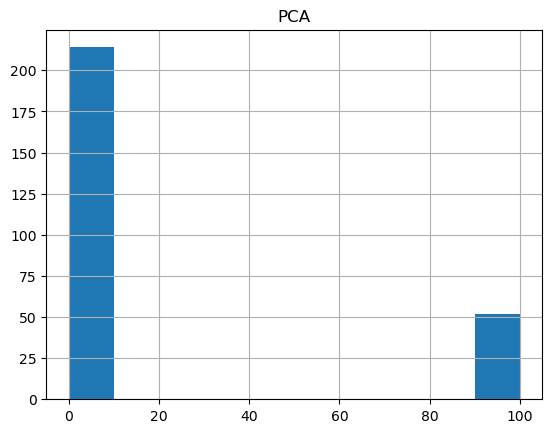

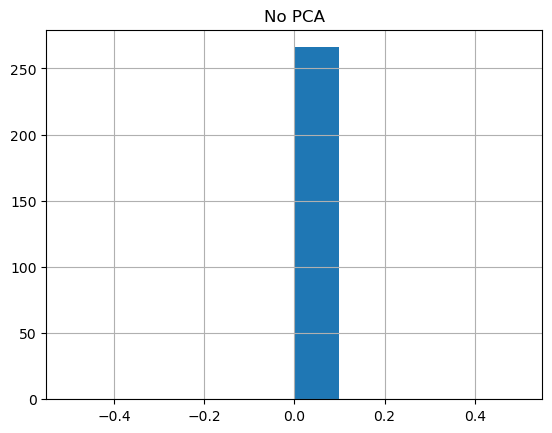

In [24]:
# Loading the object using dill
# with open(os.path.join(sd_results_path,dfs_file_name), 'rb') as f:
#     loaded_dict = pickle.load(f)

calc_result_ps(df_en, df, results_dfs_df_en, results_dfs_df,reduction_method)

### 3.4 Apriori

In [25]:
apri_results = {}

Find Subgroups

In [26]:
t1 = datetime.datetime.now()
results_df_apri = adjustedApriori(df)
results_df_apri['subgroup'] = results_df_apri['subgroup'].apply(lambda x: str(x))[0]
t2 = datetime.datetime.now()
running_time_df_apri = t2-t1

apri_results['df']=df
apri_results['df_results']=results_df_apri
apri_results['df_running_time']=running_time_df_apri

Apriori: Using numba for speedup
76
76 int32 int64


w:\Users\wfeij\anaconda3\Lib\site-packages\pysubgroup\binary_target.py:356: RuntimeWarning: invalid value encountered in divide
  p_subgroup = np.divide(positives_subgroup, instances_subgroup)


In [27]:
t1 = datetime.datetime.now()
results_df_apri_en = adjustedApriori(df_en)
results_df_apri_en['subgroup'] = results_df_apri_en['subgroup'].apply(lambda x: str(x))[0]
t2 = datetime.datetime.now()
running_time_df_en_apri = t2-t1

apri_results['df_en']=df_en
apri_results['df_en_results']=results_df_apri_en
apri_results['df_en_running_time']=running_time_df_en_apri

Apriori: Using numba for speedup
31
31 int32 int64


w:\Users\wfeij\anaconda3\Lib\site-packages\pysubgroup\binary_target.py:356: RuntimeWarning: invalid value encountered in divide
  p_subgroup = np.divide(positives_subgroup, instances_subgroup)


Save Subgroups

In [28]:
now = datetime.datetime.now().strftime("%d-%m-%Y-%H-%M")
apri_file_name = f'apri-results-{now}.pkl'
with open(os.path.join(sd_results_path,apri_file_name),'wb') as f:
    pickle.dump(apri_results,f)

Analyze Subgroups

coverage auto-encoding: 52, (0.19548872180451127)
coverage no auto-encoding: 145, (0.5451127819548872)
# rows added in subgroups: 6 (0.022556390977443608)
# rows no longer in subgroups: 99, (0.37218045112781956)
average subgroup size auto encoded: 52.0
average subgroup size no auto encoding: 145.0
WRACC auto-encoding: Max: 0.07179603143196338, Mean: 5.204170427930421e-18
WRACC no auto-encoding: Max: 0.2223133020521228, Mean: 9.063045098980869e-18


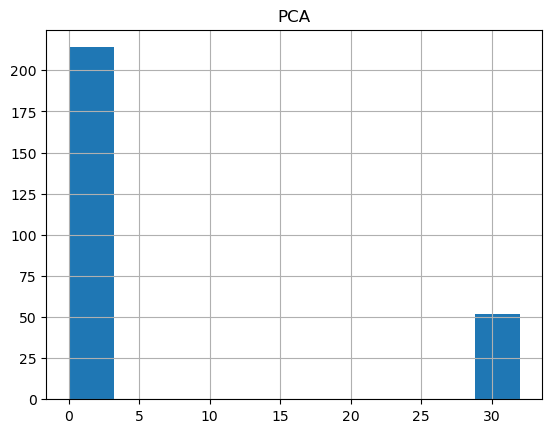

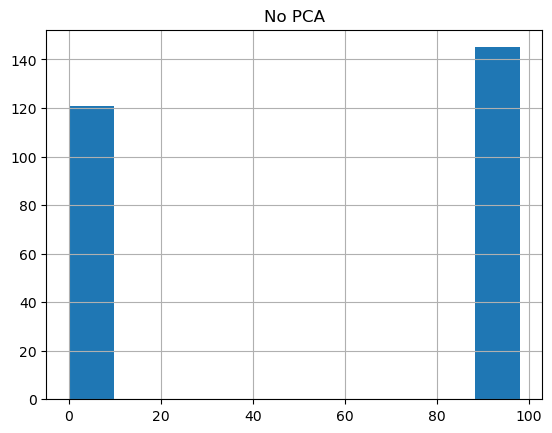

In [29]:
# Loading the object using dill
# with open(os.path.join(sd_results_path,dfs_file_name), 'rb') as f:
#     loaded_dict = pickle.load(f)

calc_result_ps(df_en, df, results_df_apri_en, results_df_apri,reduction_method)

### 4. Interpretability Measures

In [30]:
...

Ellipsis